<a href="https://colab.research.google.com/github/sparc373/ML-Models/blob/master/Working-Copy_of_1st_DNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


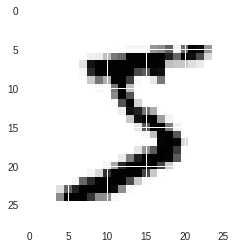

In [67]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [70]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [72]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [73]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [74]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_5 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [76]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.1963 - acc: 0.9443
Epoch 2/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.0662 - acc: 0.9801
Epoch 3/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0482 - acc: 0.9853
Epoch 4/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.0385 - acc: 0.9877
Epoch 5/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.0308 - acc: 0.9899
Epoch 6/10
60000/60000 [==============================] - 13s 220us/step - loss: 0.0244 - acc: 0.9925
Epoch 7/10
60000/60000 [==============================] - 13s 221us/step - loss: 0.0195 - acc: 0.9940
Epoch 8/10
60000/60000 [==============================] - 14s 228us/step - loss: 0.0163 - acc: 0.9949
Epoch 9/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0126 - acc: 0.9961
Epoch 10/10
60000/60000 [==============================] - 13s 218us/step - loss: 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [78]:
print(score)

[0.0870846160482919, 0.9806]


In [0]:
y_pred = model.predict(X_test)

In [81]:
print(y_pred[:9])
print(y_test[:9])

[[7.2308782e-20 1.6021871e-17 8.0536418e-15 2.9297189e-09 4.4208512e-22
  1.7438478e-17 4.6078589e-30 1.0000000e+00 7.5573642e-14 6.4416636e-12]
 [2.9880067e-11 9.4327747e-11 1.0000000e+00 3.3670966e-14 1.8198727e-22
  3.6371578e-15 1.2371751e-09 1.2577585e-24 4.3084034e-15 6.4593545e-20]
 [2.1540266e-08 9.9999762e-01 1.1111215e-06 1.2643694e-10 6.6224186e-07
  4.7155287e-11 8.7532461e-13 1.1844729e-07 4.4627683e-07 1.5332027e-10]
 [1.0000000e+00 1.8167394e-20 2.4830553e-13 6.3875113e-20 5.2276304e-21
  3.0959134e-19 1.6336724e-13 1.5045874e-17 2.3130119e-15 5.7335644e-16]
 [2.5255899e-13 1.3421451e-12 6.0949574e-13 4.9475372e-12 1.0000000e+00
  2.0323508e-17 2.5508939e-14 1.4606696e-11 1.4113059e-10 1.5273324e-08]
 [2.1375801e-10 9.9999404e-01 9.6633466e-09 1.1596661e-11 2.0131655e-08
  1.9860113e-15 8.6553537e-15 4.7550830e-06 1.1815835e-06 7.5595835e-10]
 [7.6558750e-19 2.8373559e-14 4.3252200e-11 5.7389399e-16 9.9993002e-01
  8.1193169e-12 3.5720428e-17 1.9356877e-10 6.9498812e-05 

In [82]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 26, 26, 10)        330       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 1, 1, 10)          67610     
_________________________________________________________________
flatten_5 (Flatten)          (None, 10)                0         
_________________________________________________________________
activation_5 (Activation)    (None, 10)                0         
Total params: 68,260
Trainable params: 68,260
Non-trainable params: 0
_________________________________________________________________


In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

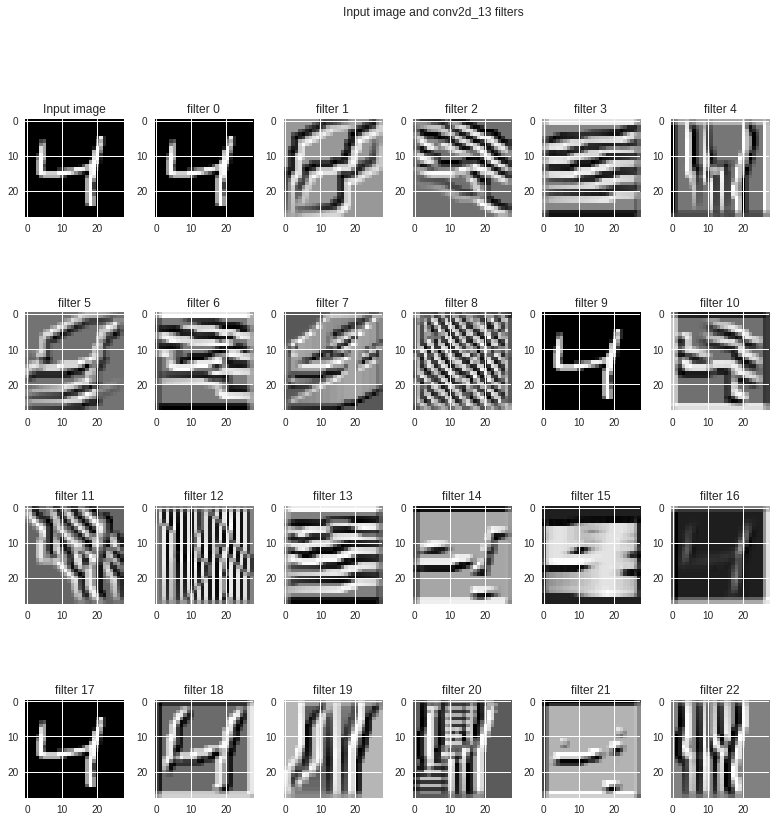

In [94]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), layer_name = 'conv2d_13'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0,0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0,0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))
        
  
vis_img_in_filter()